In [1]:
# run this once to use physical qbits

from qiskit_ibm_runtime import QiskitRuntimeService
import os
 
QiskitRuntimeService.save_account(
  token=os.environ["QISKIT_API_KEY"], # Use the 44-character API_KEY you created and saved from the IBM Quantum Platform Home dashboard
  instance=os.environ["QISKIT_CRN"], # Optional
)

In [ ]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime.fake_provider import FakeLagosV2
from qiskit_aer import AerSimulator

In [ ]:
N_BITS = 4

qft_gate = QFT(N_BITS)
qc = QuantumCircuit(N_BITS)
qc.append(qft_gate, range(N_BITS))

/tmp/ipykernel_19850/683897874.py:6: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_gate = QFT(N_BITS)


In [ ]:
backend = FakeLagosV2()
simulator = AerSimulator.from_backend(backend=backend)

{'backend_name': 'fake_lagos',
 'backend_version': '1.6.6',
 'n_qubits': 7,
 'basis_gates': ['cx', 'id', 'rz', 'sx', 'x'],
 'gates': [{'name': 'id',
   'parameters': [],
   'qasm_def': 'gate id q { U(0, 0, 0) q; }',
   'coupling_map': [[0], [1], [2], [3], [4], [5], [6]]},
  {'name': 'rz',
   'parameters': ['theta'],
   'qasm_def': 'gate rz(theta) q { U(0, 0, theta) q; }',
   'coupling_map': [[0], [1], [2], [3], [4], [5], [6]]},
  {'name': 'sx',
   'parameters': [],
   'qasm_def': 'gate sx q { U(pi/2, 3*pi/2, pi/2) q; }',
   'coupling_map': [[0], [1], [2], [3], [4], [5], [6]]},
  {'name': 'x',
   'parameters': [],
   'qasm_def': 'gate x q { U(pi, 0, pi) q; }',
   'coupling_map': [[0], [1], [2], [3], [4], [5], [6]]},
  {'name': 'cx',
   'parameters': [],
   'qasm_def': 'gate cx q0, q1 { CX q0, q1; }',
   'coupling_map': [[0, 1],
    [1, 0],
    [1, 2],
    [1, 3],
    [2, 1],
    [3, 1],
    [3, 5],
    [4, 5],
    [5, 3],
    [5, 4],
    [5, 6],
    [6, 5]]},
  {'name': 'reset', 'parame

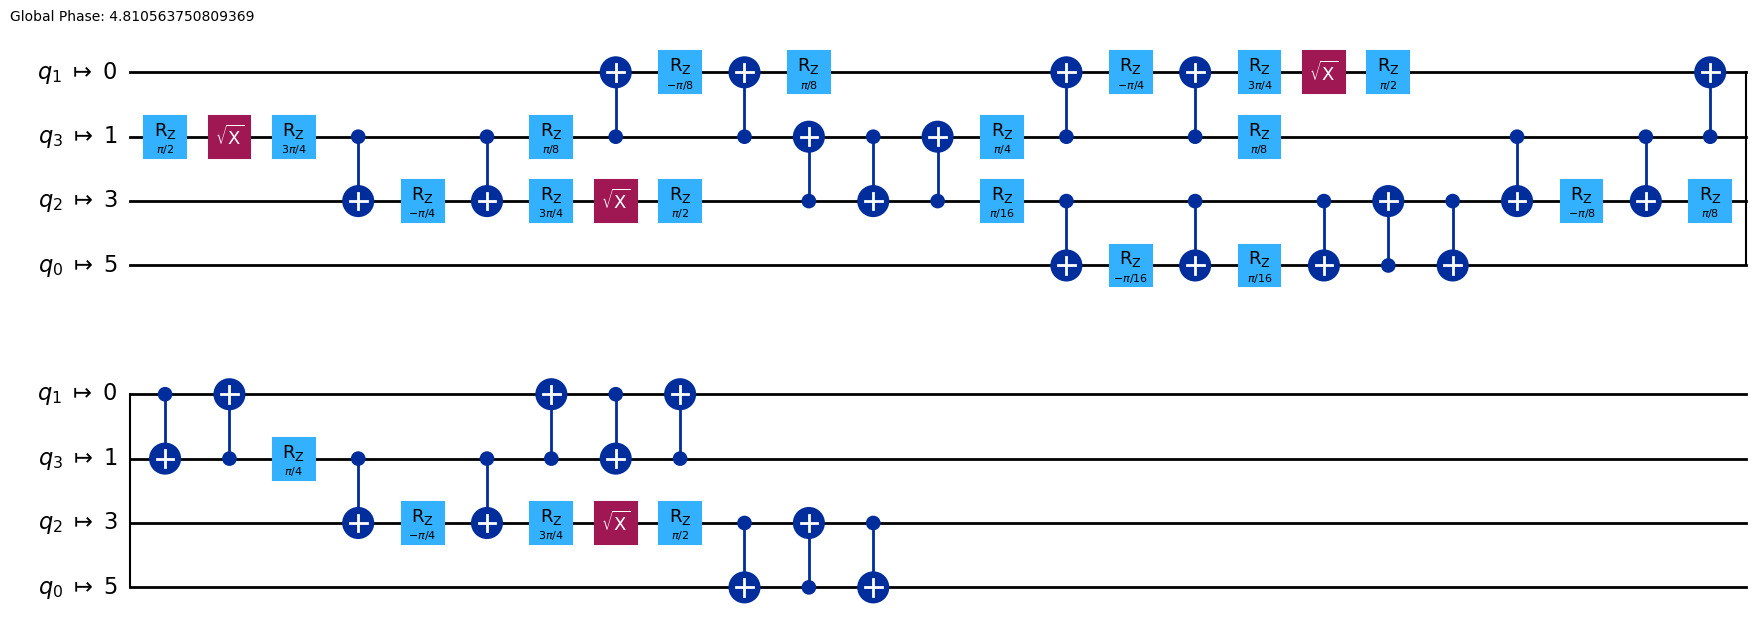

In [26]:
transpile(qc, backend=simulator, optimization_level=1).draw("mpl")


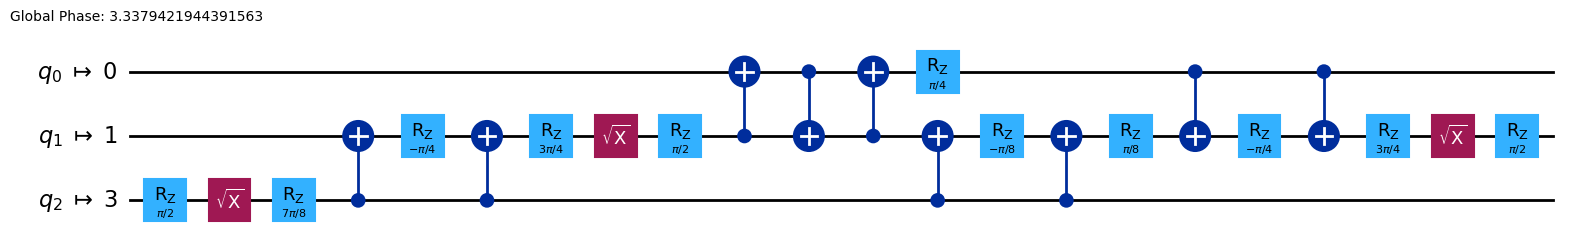

In [23]:
transpile(qc, backend=simulator, optimization_level=2).draw("mpl")


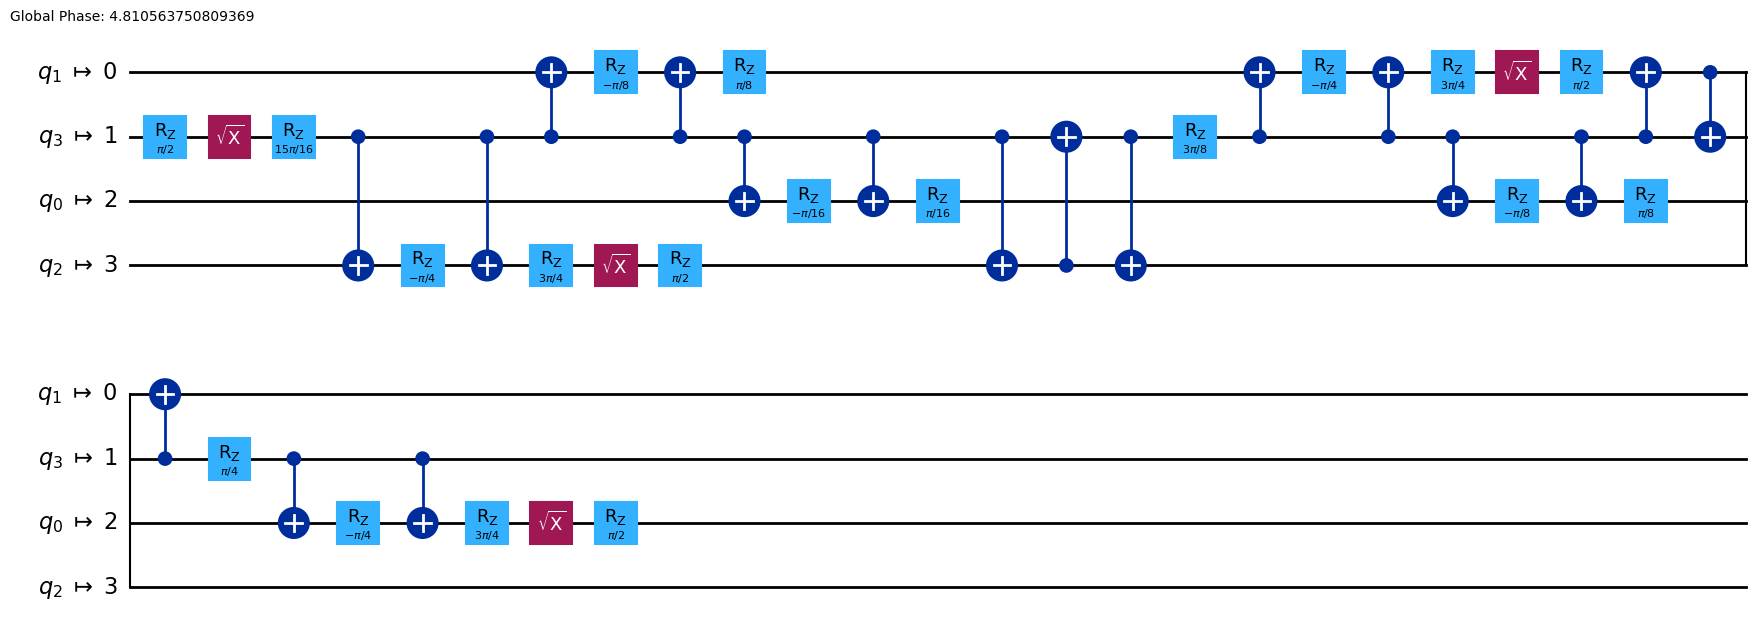

In [27]:
transpile(qc, backend=simulator, optimization_level=3).draw("mpl")

In [28]:
qc.decompose().draw()

┌──────────┐┌──────┐
q_0: ┤ U(π,0,π) ├┤0     ├
     └──────────┘│      │
q_1: ────────────┤1     ├
     ┌──────────┐│      │
q_2: ┤ U(π,0,π) ├┤2     ├
     └──────────┘│      │
q_3: ────────────┤3 QFT ├
                 │      │
q_4: ────────────┤4     ├
                 │      │
q_5: ────────────┤5     ├
                 │      │
q_6: ────────────┤6     ├
                 └──────┘